In [2]:

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns 

proj_path = 'drive/MyDrive/6.871 Project Team Folder/'
personal_path = proj_path + 'Eileen Data/'
joseph_path = proj_path + 'Joseph Data/'
sina_path = proj_path + 'Sina Data/'


In [4]:
#load in files 
mut_df = pd.read_csv(personal_path + 'mut-clean-tumor-only.csv').drop(columns='Unnamed: 0')
rna_df = pd.read_csv(personal_path + 'rna-data-tumor-only.csv')
methyl_df = pd.read_csv(personal_path + 'methyl-tumor-only.csv').drop(columns='Unnamed: 0')
exp_overlap_df = pd.read_csv(sina_path+'overlap_sina_joseph.csv').drop(columns='Unnamed: 0')
clinical_df = pd.read_csv(personal_path + 'cleaned_clinical_data.csv').drop(columns='Unnamed: 0')
judith_df = pd.read_csv(personal_path + 'relevant_judith.csv').drop(columns='Unnamed: 0')

In [68]:
RNA_RANK = 200
METHYL_RANK = 100

rna_rank = pd.read_csv(joseph_path + 'variation.csv').drop(columns='Unnamed: 0').iloc[:RNA_RANK]
rna_rank['hugo'] = rna_rank['Gene'].apply(lambda x: x.split("|",1)[0] )
methyl_rank = pd.read_csv(sina_path + 'top1000var_meth.csv').iloc[:METHYL_RANK]

In [7]:
#take only the relevant genes 
#rel_rna = rna_df[rna_df.hugo.isin(rna_rank['hugo'])].copy()
rel_rna = rna_df[rna_df.hugo.isin(exp_overlap_df['gene'])].copy()
rel_rna.drop(columns=['entrez_gene_id_rna','Gene'], inplace=True)
rel_rna.set_index('hugo', inplace=True)
rel_rna = rel_rna.T.reset_index()
rel_rna = rel_rna.add_suffix('_rna')
rel_rna.tail()


hugo,index_rna,ABCA8_rna,ABO_rna,ABRA_rna,ADAMTS16_rna,AJAP1_rna,ALX1_rna,ANKRD1_rna,ASPRV1_rna,ATP13A4_rna,B4GALNT2_rna,C21orf88_rna,C6orf223_rna,C7_rna,CCNA1_rna,CFTR_rna,CHL1_rna,CLDN17_rna,CLGN_rna,CNTN1_rna,COBL_rna,COL21A1_rna,CPA6_rna,CP_rna,CRABP1_rna,CYP26A1_rna,DKK1_rna,DMRTA1_rna,DMRTA2_rna,DNAH17_rna,EN1_rna,EPHA7_rna,EREG_rna,EYA4_rna,FABP4_rna,FADS6_rna,FAM184B_rna,FLG2_rna,GALNT5_rna,GCNT3_rna,...,MYEOV_rna,MYLPF_rna,MYOM2_rna,MYOZ2_rna,NEFM_rna,NKX2-3_rna,NPBWR1_rna,NR2E1_rna,NTSR1_rna,OGDHL_rna,PCDH10_rna,PHYHD1_rna,PIK3C2G_rna,PON3_rna,PRKAA2_rna,PRR4_rna,RANBP17_rna,RDH12_rna,RPRM_rna,SERPINA3_rna,SFRP1_rna,SGCG_rna,SHANK2_rna,SLC13A5_rna,SLC9A2_rna,SLCO1A2_rna,SLCO4C1_rna,SOSTDC1_rna,SOX2_rna,SYT13_rna,SYT1_rna,TAGLN3_rna,TCHH_rna,THBS4_rna,THSD7B_rna,TNFRSF17_rna,TRIM58_rna,VTCN1_rna,WISP3_rna,ZIC1_rna
516,TCGA-UF-A7JT,-2.914661,-4.645924,-4.095972,-1.571318,-1.739704,1.569714,0.005410,5.241212,-0.105291,-5.545719,-5.545719,-2.273994,-1.930373,-1.653056,-5.545719,-4.095972,2.582471,-2.914661,3.453781,1.016622,-0.256799,1.533224,-0.985163,-3.698764,-2.409494,3.312895,-2.914661,-2.914661,6.002050,1.437745,-5.545719,6.081711,-0.887941,6.261858,-4.095972,-5.545719,2.407041,-0.702458,1.715257,...,0.906811,-1.044598,0.571108,-2.273994,-5.545719,-3.387640,-4.645924,-3.387640,-2.559053,-4.095972,0.458859,-0.289108,-4.095972,-2.914661,-3.387640,0.292860,-1.930373,0.399280,-3.698764,6.595713,-0.577490,-2.559053,-2.914661,-4.645924,-1.571318,3.685503,-2.725928,-3.131854,4.448702,-5.545719,1.809814,-4.645924,-1.653056,4.328744,-5.545719,1.081237,2.449957,-1.653056,0.989942,-2.725928
517,TCGA-UF-A7JV,-1.619289,-1.692166,-4.240107,-0.493479,0.328219,-3.307302,-1.089882,-1.493470,-2.598116,-1.301641,-1.420445,-1.768920,-2.909564,4.879074,-4.760865,1.029368,-5.583799,0.656397,-1.935885,1.029368,2.162947,-0.339201,2.623740,-5.583799,-4.760865,3.455760,1.774016,-5.583799,2.370117,-3.556645,-4.240107,4.157901,-4.760865,-0.339201,-2.342111,-4.705505,-4.240107,3.330286,-1.692166,...,5.755079,-4.240107,-2.745452,-5.583799,-0.276778,-5.583799,-1.420445,-5.583799,-3.556645,-4.240107,-2.027222,0.233021,-2.745452,-3.858276,-2.342111,0.732021,-0.001556,0.172734,-5.583799,10.309089,1.466056,-2.909564,6.475884,2.649406,-3.858276,-3.858276,-2.909564,-0.493479,0.290890,-4.240107,2.173242,4.372999,-0.862579,1.631975,-3.094770,-4.760865,-2.124734,1.127919,-3.556645,-4.240107
518,TCGA-UP-A6WW,-1.470776,-5.437870,-4.178327,0.587464,-1.234074,2.704907,-4.674714,0.908544,1.980777,4.270923,0.748036,3.391249,-1.289701,-2.322138,-0.895154,0.508121,-5.437870,5.585307,3.187347,-4.178327,3.371231,-2.882103,1.340556,0.159160,0.028776,-4.178327,1.293628,4.537871,0.824837,1.702894,-4.178327,0.316488,-3.516282,-2.443110,-1.754084,-4.061358,-3.272569,3.318717,4.116304,...,1.745032,-3.272569,-2.443110,-1.919763,-2.055923,3.585454,-2.720485,2.044028,-1.180498,4.349277,-3.516282,7.141823,-4.178327,3.698247,2.203642,0.166622,3.556167,-2.010345,1.614733,3.430534,-0.657035,-2.720485,0.775403,-3.809610,4.428990,-0.302081,-2.322138,1.101571,6.111513,-4.674714,-3.064194,-2.882103,-0.811338,4.412743,-3.516282,1.035192,-3.064194,0.508121,-3.064194,2.282061
519,TCGA-WA-A7GZ,5.253143,3.537264,6.339071,-2.055025,-0.899840,-1.276116,3.605937,1.863178,5.264271,0.820785,-5.705009,-3.067028,2.028413,-1.560310,0.349592,3.916871,1.750999,2.808995,2.625568,6.382271,3.715395,-3.870136,1.181193,-0.266649,-5.705009,-0.835068,0.800546,-5.705009,-0.266649,-3.870136,-0.835068,4.271439,3.611757,3.859327,-0.067503,2.155613,1.251919,3.930906,5.071860,...,2.746885,9.769599,7.350041,6.439840,4.025458,2.340247,-5.705009,-4.513699,-3.870136,-0.601671,-1.668998,3.893173,2.333220,-1.786565,6.297699,0.019832,-2.210644,2.863672,0.650307,3.534202,7.375707,5.685811,1.251919,-2.583629,3.435931,-3.870136,-2.813901,1.708179,5.662869,-3.087992,-1.038809,-5.705009,0.556864,7.218676,1.026490,-5.705009,1.232409,-4.513699,-3.870136,0.349592
520,TCGA-WA-A7H4,1.850538,1.817608,-0.252839,0.860660,3.9719

In [70]:
rel_rna[rel_rna.isnull().any(axis=1)]

hugo,index_rna,ACTA1_rna,ACTC1_rna,ACTN2_rna,ADH1C_rna,ADH7_rna,AMTN_rna,ANKRD1_rna,APOBEC2_rna,AQP5_rna,ARPP21_rna,ASB5_rna,ATP12A_rna,ATP1A2_rna,AZGP1_rna,C10orf71_rna,C18orf26_rna,C1orf110_rna,C20orf114_rna,C4orf7_rna,CACNA1S_rna,CACNG1_rna,CALB1_rna,CASP14_rna,CASQ1_rna,CASQ2_rna,CAV3_rna,CDKN2A_rna,CDSN_rna,CEACAM5_rna,CEACAM7_rna,CES1_rna,CHGB_rna,CHRND_rna,CHST9_rna,CKMT2_rna,CKM_rna,CLDN10_rna,CLDN3_rna,COX6A2_rna,...,SMPX_rna,SMYD1_rna,SPINK6_rna,SPINK7_rna,SPRR2B_rna,SPRR2E_rna,SPRR2F_rna,SPRR2G_rna,SPRR3_rna,STATH_rna,TCAP_rna,TCN1_rna,TDRD5_rna,TGM3_rna,TMPRSS11A_rna,TMPRSS11B_rna,TMPRSS2_rna,TNNC1_rna,TNNC2_rna,TNNT3_rna,TRDN_rna,TRIM54_rna,TRIM63_rna,TTTY15_rna,UGT1A10_rna,UGT1A6_rna,UGT1A7_rna,UGT1A9_rna,UNC45B_rna,UPK1B_rna,USP9Y_rna,UTY_rna,WFDC12_rna,WFDC2_rna,WIF1_rna,XIRP2_rna,XIST_rna,ZFY_rna,ZG16B_rna,ZNHIT2_rna


In [8]:
#rel_methyl = methyl_df[methyl_df.Hugo_Symbol.isin(methyl_rank['Hugo_Symbol'])].copy()
rel_methyl = methyl_df[methyl_df.Hugo_Symbol.isin(exp_overlap_df['gene'])].copy()
rel_methyl = rel_methyl.drop(columns='Entrez_Gene_Id')
rel_methyl = rel_methyl.set_index('Hugo_Symbol')
rel_methyl = rel_methyl.T.reset_index()
rel_methyl['patient_id'] = rel_methyl['index'].str[:-3]
rel_methyl.drop(columns='index', inplace=True)
rel_methyl = rel_methyl.add_suffix('_methyl')
rel_methyl['patient_id'] = rel_methyl['patient_id_methyl']
rel_methyl.drop(columns='patient_id_methyl', inplace=True)
rel_methyl.tail()

Hugo_Symbol,NTSR1_methyl,FADS6_methyl,DKK1_methyl,MYEOV_methyl,RANBP17_methyl,SFRP1_methyl,EYA4_methyl,MUC15_methyl,TCHH_methyl,PON3_methyl,EN1_methyl,GSTM2_methyl,FLG2_methyl,SLC9A2_methyl,SLCO4C1_methyl,ASPRV1_methyl,SOX2_methyl,CP_methyl,MYLPF_methyl,IRX1_methyl,HP_methyl,SERPINA3_methyl,ATP13A4_methyl,SOSTDC1_methyl,NPBWR1_methyl,COL21A1_methyl,ABO_methyl,MYOZ2_methyl,GRIN2A_methyl,LCE1C_methyl,MRAP2_methyl,AJAP1_methyl,DNAH17_methyl,KLK14_methyl,VTCN1_methyl,HOXC11_methyl,C7_methyl,CFTR_methyl,CYP26A1_methyl,SYT13_methyl,...,ABRA_methyl,NR2E1_methyl,DMRTA2_methyl,KHDC1L_methyl,PIK3C2G_methyl,C21orf88_methyl,MGST1_methyl,MFAP5_methyl,C6orf223_methyl,EREG_methyl,FABP4_methyl,CHL1_methyl,GSTA1_methyl,TAGLN3_methyl,MUC20_methyl,CPA6_methyl,MYOM2_methyl,EPHA7_methyl,ANKRD1_methyl,KLK13_methyl,NKX2-3_methyl,INA_methyl,TRIM58_methyl,NEFM_methyl,RDH12_methyl,HOXA7_methyl,ZIC1_methyl,GCNT3_methyl,CLDN17_methyl,GSTM1_methyl,HOXD11_methyl,PRR4_methyl,THSD7B_methyl,PRKAA2_methyl,GPX2_methyl,RPRM_methyl,FAM184B_methyl,GALNT5_methyl,ABCA8_methyl,patient_id
523,0.400561,0.317561,0.146823,0.613846,0.820526,0.320866,0.563648,0.924899,0.139187,0.779958,0.378191,0.544396,0.709982,0.690393,0.502481,0.744787,0.707592,0.752967,0.921330,0.087497,0.512293,0.623209,0.910443,0.548923,0.307073,0.519056,0.421844,0.672461,0.564345,0.846812,0.722628,0.398115,0.395131,0.962170,0.836720,0.118113,0.673303,0.660211,0.434549,0.561419,...,0.774741,0.510251,0.586124,0.904518,0.903828,0.099040,0.475019,0.749119,0.304638,0.072014,0.419677,0.517722,0.576644,0.762222,0.886982,0.462801,0.025240,0.520558,0.410326,0.518851,0.288979,0.475844,0.017671,0.515629,0.854630,0.188757,0.711412,0.622364,0.695435,0.137747,0.119657,0.901334,0.674234,0.064686,0.878153,0.572651,0.431580,0.618141,0.768487,TCGA-UF-A7JT
524,0.550781,0.018230,0.186720,0.507489,0.853415,0.401624,0.556385,0.845866,0.165251,0.916054,0.502347,0.338760,0.780719,0.504191,0.425832,0.968841,0.442403,0.847770,0.946178,0.471945,0.565000,0.514473,0.846330,0.364802,0.504565,0.067450,0.093786,0.880604,0.032672,0.893184,0.711455,0.489235,0.830097,0.966675,0.707097,0.489104,0.736010,0.318001,0.268383,0.206352,...,0.701119,0.514040,0.612810,0.934793,0.874850,0.027879,0.099149,0.900951,0.625254,0.514272,0.444403,0.660487,0.868800,0.177012,0.773882,0.835424,0.065221,0.215259,0.224034,0.591825,0.509947,0.471265,0.497543,0.473985,0.610832,0.362328,0.058529,0.521267,0.874649,0.767590,0.589440,0.893444,0.711992,0.026694,0.895318,0.480849,0.184171,0.094811,0.703787,TCGA-UF-A7JV
525,0.691468,0.024021,0.915042,0.889781,0.148026,0.520251,0.770270,0.697273,0.580004,0.809308,0.838649,0.065955,0.866016,0.279565,0.699179,0.979494,0.825317,0.309603,0.930555,0.836854,0.810712,0.734991,0.916400,0.192048,0.229190,0.067686,0.696434,0.846038,0.019164,0.518554,0.754165,0.683882,0.872153,0.947387,0.129118,0.711201,0.862717,0.902552,0.579346,0.754107,...,0.888353,0.723040,0.529381,0.927743,0.893800,0.021011,0.827396,0.841567,0.167673,0.823728,0.891500,0.148740,0.695764,0.911512,0.260969,0.833390,0.217808,0.781572,0.782734,0.874225,0.039548,0.028651,0.739039,0.771051,0.556491,0.604688,0.904268,0.203798,0.134103,0.153425,0.487220,0.700422,0.501506,0.023177,0.741111,0.025061,0.015155,0.097989,0.162766,TCGA-UP-A6WW
526,0.058409,0.285966,0.547100,0.785253,0.736704,0.507621,0.446453,0.753673,0.582392,0.898628,0.210265,0.221299,0.838621,0.755838,0.038300,0.472447,0.772907,0.743787,0.411853,0.740165,0.319173,0.551235,0.937631,0.358700,0.043928,0.051234,0.555219,0.457637,0.017890,0.703380,0.392777,0.038365,0.843027,0.939459,0.534298,0.114277,0.369351,0.727509,0.558611,0.220596,...,0.741581,0.596932,0.613302,0.924216,0.509607,0.024955,0.722159,0.674053,0.317505,0.611385,0.263464,0.143190,0.411682,0.792752,0.405611,0.850223,0.027435,0.057400,0.288845,0.239301,0.618311,0.359281,0.016907,0.105537,0.605845,0.278493,0.378775,0.523924,0.606559,0.356625,0.077756,0.452060,0.323569,0.025908,0.515262,0.105771,0.062557,0.578208,0.717535,TCGA-WA-A7GZ
527,0.08

In [9]:
overlap_merged = rel_rna.merge(rel_methyl, left_on='index_rna', right_on='patient_id', suffixes=('_rna','_methyl'))
overlap_merged.drop(columns='index_rna', inplace=True)
overlap_merged.head()

,ABCA8_rna,ABO_rna,ABRA_rna,ADAMTS16_rna,AJAP1_rna,ALX1_rna,ANKRD1_rna,ASPRV1_rna,ATP13A4_rna,B4GALNT2_rna,C21orf88_rna,C6orf223_rna,C7_rna,CCNA1_rna,CFTR_rna,CHL1_rna,CLDN17_rna,CLGN_rna,CNTN1_rna,COBL_rna,COL21A1_rna,CPA6_rna,CP_rna,CRABP1_rna,CYP26A1_rna,DKK1_rna,DMRTA1_rna,DMRTA2_rna,DNAH17_rna,EN1_rna,EPHA7_rna,EREG_rna,EYA4_rna,FABP4_rna,FADS6_rna,FAM184B_rna,FLG2_rna,GALNT5_rna,GCNT3_rna,GLDC_rna,...,ABRA_methyl,NR2E1_methyl,DMRTA2_methyl,KHDC1L_methyl,PIK3C2G_methyl,C21orf88_methyl,MGST1_methyl,MFAP5_methyl,C6orf223_methyl,EREG_methyl,FABP4_methyl,CHL1_methyl,GSTA1_methyl,TAGLN3_methyl,MUC20_methyl,CPA6_methyl,MYOM2_methyl,EPHA7_methyl,ANKRD1_methyl,KLK13_methyl,NKX2-3_methyl,INA_methyl,TRIM58_methyl,NEFM_methyl,RDH12_methyl,HOXA7_methyl,ZIC1_methyl,GCNT3_methyl,CLDN17_methyl,GSTM1_methyl,HOXD11_methyl,PRR4_methyl,THSD7B_methyl,PRKAA2_methyl,GPX2_methyl,RPRM_methyl,FAM184B_methyl,GALNT5_methyl,ABCA8_methyl,patient_id
0,1.557654,2.147765,-2.268722,3.113584,2.671448,0.542092,5.766262,1.321528,-0.288921,2.867989,-3.743013,-1.162944,-0.385739,4.346536,-0.336518,2.464821,-5.535868,-1.939864,-0.787300,2.584665,-1.939864,-1.554947,1.012886,-0.198186,-3.304006,6.315385,0.404096,-4.377273,3.712660,2.873229,-2.268722,3.825877,2.485500,3.468942,-1.079588,-2.470606,-1.000774,2.002293,2.584665,-0.436708,...,0.749016,0.452573,0.495818,0.901373,0.885238,0.028297,0.642891,0.697315,0.554884,0.147863,0.391490,0.246372,0.556203,0.595189,0.751476,0.730767,0.034057,0.050458,0.388398,0.109811,0.222881,0.019742,0.413842,0.404496,0.632986,0.045949,0.071123,0.823219,0.805008,0.036893,0.102092,0.818649,0.599844,0.022781,0.813552,0.171030,0.026073,0.371098,0.715685,TCGA-4P-AA8J
1,0.117535,1.213815,-4.817821,-1.195265,-1.747521,-1.824292,3.170226,5.251076,-1.991297,-5.642222,-4.296485,2.742117,0.700464,-0.960526,-1.195265,1.561811,-5.642222,0.780414,4.567379,-1.195265,3.362160,2.700833,1.406199,-4.296485,-1.145159,5.101272,3.206857,-0.615369,4.190978,0.362338,-3.150472,9.093775,2.367126,1.771981,-5.642222,-1.923850,-5.642222,2.731328,4.419159,0.462685,...,0.435238,0.411251,0.649659,0.395695,0.465423,0.321047,0.158926,0.543199,0.416817,0.109930,0.331764,0.351325,0.308160,0.197579,0.529991,0.391456,0.032398,0.520016,0.290789,0.126430,0.027775,0.475310,0.496648,0.539682,0.365447,0.437677,0.791362,0.863994,0.721728,0.031900,0.382398,0.900419,0.402136,0.023367,0.765983,0.044016,0.285295,0.043882,0.322625,TCGA-BA-4074
2,-1.000568,-2.467758,-1.655168,-0.758881,3.642268,-5.555832,3.634348,0.275128,-5.555832,2.271877,-3.903231,-2.296469,-0.936243,-0.031574,-3.903231,-1.555165,-5.555832,-1.655168,4.223775,1.819911,-1.000568,-5.555832,1.147191,-2.467758,-3.903231,5.889781,1.743426,-3.903231,3.784233,-1.762623,-3.903231,5.950582,1.187301,2.763256,-1.461646,-5.555832,-5.555832,-0.504521,-0.065576,1.782175,...,0.861416,0.542075,0.740941,0.936405,0.372721,0.550145,0.174050,0.936734,0.804181,0.087428,0.562250,0.597198,0.718966,0.775508,0.813528,0.828576,0.026867,0.636452,0.139197,0.531091,0.676791,0.500794,0.562032,0.024886,0.761065,0.021146,0.872351,0.750727,0.932814,0.178476,0.113068,0.935810,0.573232,0.025287,0.757588,0.511402,0.425559,0.720981,0.837754,TCGA-BA-4075
3,-3.434160,0.488682,-5.486715,-3.108814,3.913738,-0.561437,-2.843505,4.284498,0.604249,1.211595,-5.486715,4.035935,-3.854912,5.829639,-4.451513,-1.027992,-1.614575,-0.465075,6.228113,3.579973,-0.775936,-0.960734,-2.836226,-2.425595,-5.486715,5.605955,-2.254729,-3.854912,5.240703,3.078593,-3.854912,6.130280,2.706804,4.334391,0.690466,-4.429438,-0.331613,-0.374740,4.066647,-1.250926,...,0.768129,0.727965,0.806348,0.914077,0.934582,0.017078,0.116428,0.935789,0.214696,0.084022,0.731391,0.696624,0.133814,0.849137,0.965134,0.431055,0.020677,0.791419,0.528963,0.889709,0.777913,0.025335,0.524116,0.033054,0.920255,0.025003,0.490785,0.858426,0.888934,0.937528,0.055753,0.907215,0.701803,0.019472,0.759805,0.282398,0.377088,0.749973,0.720849,TCGA-BA-4076
4,-1.220108,2.791281,-5.415802,-1.560370,1.129496,1.158

In [10]:
with_judith = overlap_merged.merge(judith_df, left_on='patient_id', right_on='PATIENT_ID')
with_judith.drop(columns='PATIENT_ID', inplace=True)
with_judith.head()

,ABCA8_rna,ABO_rna,ABRA_rna,ADAMTS16_rna,AJAP1_rna,ALX1_rna,ANKRD1_rna,ASPRV1_rna,ATP13A4_rna,B4GALNT2_rna,C21orf88_rna,C6orf223_rna,C7_rna,CCNA1_rna,CFTR_rna,CHL1_rna,CLDN17_rna,CLGN_rna,CNTN1_rna,COBL_rna,COL21A1_rna,CPA6_rna,CP_rna,CRABP1_rna,CYP26A1_rna,DKK1_rna,DMRTA1_rna,DMRTA2_rna,DNAH17_rna,EN1_rna,EPHA7_rna,EREG_rna,EYA4_rna,FABP4_rna,FADS6_rna,FAM184B_rna,FLG2_rna,GALNT5_rna,GCNT3_rna,GLDC_rna,...,FAM184B_methyl,GALNT5_methyl,ABCA8_methyl,patient_id,purity,ploidy,mutation_count_protected,pyclone_protected_hg38_vcf_nb_clones,pyclone_protected_hg38_vcf_clonal_prop,pyclone_protected_hg38_vcf_smallest_vaf,pyclone_protected_hg38_vcf_shannon_index,pyclone_protected_hg38_vcf_most_populated_clone_vaf,B cells,Blood vessels,CD8 T cells,Cytotoxic cells,DC,Eosinophils,Lymph vessels,Macrophages,Mast cells,NK CD56bright cells,NK CD56dim cells,NK cells,Neutrophils,Normal mucosa,SW480 cancer cells,T cells,T helper cells,TFH,TReg,Tcm,Tem,Tgd,Th1 cells,Th17 cells,Th2 cells,aDC,iDC,pDC
0,1.557654,2.147765,-2.268722,3.113584,2.671448,0.542092,5.766262,1.321528,-0.288921,2.867989,-3.743013,-1.162944,-0.385739,4.346536,-0.336518,2.464821,-5.535868,-1.939864,-0.787300,2.584665,-1.939864,-1.554947,1.012886,-0.198186,-3.304006,6.315385,0.404096,-4.377273,3.712660,2.873229,-2.268722,3.825877,2.485500,3.468942,-1.079588,-2.470606,-1.000774,2.002293,2.584665,-0.436708,...,0.026073,0.371098,0.715685,TCGA-4P-AA8J,0.39,2.018121,513,3.0,72.955975,0.170311,0.676572,0.891402,7.364012,9.875779,10.179443,8.105936,7.669742,8.328616,9.867962,9.558679,6.984006,9.093984,6.342259,9.218097,7.391664,11.561032,10.578972,8.159443,10.436243,8.499772,9.157542,9.241135,9.589788,5.402361,8.439242,5.267731,8.891498,8.235654,9.165081,9.302137
1,0.117535,1.213815,-4.817821,-1.195265,-1.747521,-1.824292,3.170226,5.251076,-1.991297,-5.642222,-4.296485,2.742117,0.700464,-0.960526,-1.195265,1.561811,-5.642222,0.780414,4.567379,-1.195265,3.362160,2.700833,1.406199,-4.296485,-1.145159,5.101272,3.206857,-0.615369,4.190978,0.362338,-3.150472,9.093775,2.367126,1.771981,-5.642222,-1.923850,-5.642222,2.731328,4.419159,0.462685,...,0.285295,0.043882,0.322625,TCGA-BA-4074,0.53,1.858881,425,2.0,98.574822,0.217257,0.074732,0.999934,6.333330,9.129016,9.835758,6.747576,7.755525,7.673968,8.775841,9.203785,5.852562,7.562580,5.063666,8.196488,8.448826,11.644463,9.966819,7.737588,10.775497,7.241974,5.938767,8.948001,9.047853,5.439974,8.309369,5.645806,9.251077,7.748374,8.030169,7.355107
2,-3.434160,0.488682,-5.486715,-3.108814,3.913738,-0.561437,-2.843505,4.284498,0.604249,1.211595,-5.486715,4.035935,-3.854912,5.829639,-4.451513,-1.027992,-1.614575,-0.465075,6.228113,3.579973,-0.775936,-0.960734,-2.836226,-2.425595,-5.486715,5.605955,-2.254729,-3.854912,5.240703,3.078593,-3.854912,6.130280,2.706804,4.334391,0.690466,-4.429438,-0.331613,-0.374740,4.066647,-1.250926,...,0.377088,0.749973,0.720849,TCGA-BA-4076,0.80,2.005361,1117,2.0,96.599265,0.188639,0.148407,1.000000,5.838216,9.227329,9.820367,6.266315,7.488776,7.954307,9.172810,8.241911,6.442895,8.527186,5.210269,8.392454,7.233664,10.051394,10.377362,6.370501,10.706998,7.432599,7.915318,9.253472,9.234470,4.723629,7.870180,8.183354,8.852946,7.478419,8.408581,6.815348
3,-0.700590,2.450555,-4.700674,-1.046276,-0.300482,-3.950647,-1.936023,1.228382,2.613955,1.059160,2.598423,4.057931,-2.452676,-3.950647,-1.085882,5.322391,-0.064620,-0.188475,5.985567,-0.447491,3.764990,1.453779,-0.157340,0.221531,1.796368,1.368443,1.604447,-2.259176,5.018453,-0.188475,4.043723,-1.556392,0.664949,-0.167077,2.404855,-1.729361,-1.672196,4.313825,-2.010289,-2.802493,...,0.015568,0.079346,0.446729,TCGA-BA-4078,0.82,1.805700,1431,2.0,98.937677,0.159589,0.058846,1.000000,6.757587,10.437948,10.109436,6.780726,7.598434,8.212038,8.364989,9.152089,6.567443,9.723004,5.668968,9.089057,7.031144,11.597361,9.922660,7.965691,10.595261,8.458579,8.870530,9.613224,9.783745,5.161764,7.572043,4.960331,8.878716,7.954859,8.687198,8.524411
4,-4.261041,-3.894903,-2.533619,-2.971457,6.

In [11]:
def bin_survival_years(years, df):
  def censored_survival(row):
    #alive, os is greater than yr
    if float(row.OS_MONTHS) >= years*12: 
      return 0 
    
    #ded, os is less than yr 
    elif float(row.OS_MONTHS) <= years*12 and row.BINARY_SURVIVAL == 1:
      return 1 
    #censor 
    else: 
      return -1

  df["{}YR_BINARY_SURVIVAL".format(years)] = df.apply(censored_survival, axis=1)

survival_censored = clinical_df.replace('[Not Available]', np.nan)

bin_survival_years(5, survival_censored)
bin_survival_years(3, survival_censored)
bin_survival_years(1, survival_censored)
survival_censored.head()

,PATIENT_ID,SEX,AGE,PRIMARY_SITE_PATIENT,RACE,SMOKING_PACK_YEARS,CLIN_N_STAGE,CLIN_T_STAGE,CLIN_M_STAGE,CLINICAL_STAGE,OS_MONTHS,BINARY_SURVIVAL,HPV_STATUS,5YR_BINARY_SURVIVAL,3YR_BINARY_SURVIVAL,1YR_BINARY_SURVIVAL
0,TCGA-4P-AA8J,Male,66,Oral Tongue,BLACK OR AFRICAN AMERICAN,NaN,N2a,T4a,M0,Stage IVA,3.35,0,0,-1,-1,-1
1,TCGA-BA-4074,Male,69,Oral Tongue,WHITE,51,N2c,T3,M0,Stage IVA,15.18,1,0,1,1,0
2,TCGA-BA-4075,Male,49,Oral Tongue,BLACK OR AFRICAN AMERICAN,30,N1,T4a,M0,Stage IVA,9.3,1,0,1,1,1
3,TCGA-BA-4076,Male,39,Larynx,WHITE,30,N2c,T3,M0,Stage IVA,13.63,1,0,1,1,0
4,TCGA-BA-4077,Female,45,Base of tongue,WHITE,30,N3,T4b,M0,Stage IVB,37.25,1,1,1,0,0


In [76]:
survival_censored['3YR_BINARY_SURVIVAL'].value_counts()

-1    197
 1    186
 0    145
Name: 3YR_BINARY_SURVIVAL, dtype: int64

In [77]:
survival_plot = pd.concat([survival_censored['{}YR_BINARY_SURVIVAL'.format(time)].value_counts() for time in range(1,6,2) ], axis=1).reset_index()
survival_plot = survival_plot.drop(columns='index')
survival_plot['status'] = ['withdrawn', 'alive', 'deceased']
survival_plot = survival_plot.set_index('status')
survival_plot.head()

,1YR_BINARY_SURVIVAL,3YR_BINARY_SURVIVAL,5YR_BINARY_SURVIVAL
status,,,
withdrawn,38,197,271
alive,402,145,54
deceased,88,186,203


Text(0, 0.5, 'lololo')

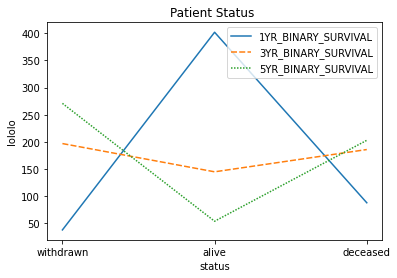

In [78]:
ax = sns.lineplot(data=survival_plot)
ax.set_title('Patient Status ')
ax.set_ylabel('lololo')

In [79]:
normalized_survival_plot = survival_plot/528
normalized_survival_plot = normalized_survival_plot
normalized_survival_plot.head()

,1YR_BINARY_SURVIVAL,3YR_BINARY_SURVIVAL,5YR_BINARY_SURVIVAL
status,,,
withdrawn,0.071970,0.373106,0.513258
alive,0.761364,0.274621,0.102273
deceased,0.166667,0.352273,0.384470


In [80]:
cluster = pd.read_csv(sina_path+'5Y_Top100_clusters.csv').drop(columns=['Unnamed: 0', 'surv','time'])
cluster['rna_cluster'] = cluster['c'].apply(lambda x: str(x))
cluster = cluster.drop(columns='c').set_index('patient')
cluster.head()

,rna_cluster
patient,
TCGA-4P-AA8J,2
TCGA-BA-4074,1
TCGA-BA-4076,3
TCGA-BA-4078,3
TCGA-BA-5149,1


In [12]:
clinical_cluster = clinical_df.merge(cluster, left_on='PATIENT_ID', right_index=True)
clinical_cluster.head()

NameError: ignored

In [16]:
patient_idx_df = with_judith.set_index('patient_id')
#get mutation count
patient_idx_df['mutation_count'] = mut_df['PATIENT_ID'].value_counts()
#45 patients have no mutations in top 400 genes, set to null 
all_merged_df = survival_censored.merge(patient_idx_df, left_on='PATIENT_ID', right_index=True )
#7 patients don't have rna/methyl seq 
all_merged_df.head()

,PATIENT_ID,SEX,AGE,PRIMARY_SITE_PATIENT,RACE,SMOKING_PACK_YEARS,CLIN_N_STAGE,CLIN_T_STAGE,CLIN_M_STAGE,CLINICAL_STAGE,OS_MONTHS,BINARY_SURVIVAL,HPV_STATUS,5YR_BINARY_SURVIVAL,3YR_BINARY_SURVIVAL,1YR_BINARY_SURVIVAL,ABCA8_rna,ABO_rna,ABRA_rna,ADAMTS16_rna,AJAP1_rna,ALX1_rna,ANKRD1_rna,ASPRV1_rna,ATP13A4_rna,B4GALNT2_rna,C21orf88_rna,C6orf223_rna,C7_rna,CCNA1_rna,CFTR_rna,CHL1_rna,CLDN17_rna,CLGN_rna,CNTN1_rna,COBL_rna,COL21A1_rna,CPA6_rna,CP_rna,CRABP1_rna,...,FAM184B_methyl,GALNT5_methyl,ABCA8_methyl,purity,ploidy,mutation_count_protected,pyclone_protected_hg38_vcf_nb_clones,pyclone_protected_hg38_vcf_clonal_prop,pyclone_protected_hg38_vcf_smallest_vaf,pyclone_protected_hg38_vcf_shannon_index,pyclone_protected_hg38_vcf_most_populated_clone_vaf,B cells,Blood vessels,CD8 T cells,Cytotoxic cells,DC,Eosinophils,Lymph vessels,Macrophages,Mast cells,NK CD56bright cells,NK CD56dim cells,NK cells,Neutrophils,Normal mucosa,SW480 cancer cells,T cells,T helper cells,TFH,TReg,Tcm,Tem,Tgd,Th1 cells,Th17 cells,Th2 cells,aDC,iDC,pDC,mutation_count
0,TCGA-4P-AA8J,Male,66,Oral Tongue,BLACK OR AFRICAN AMERICAN,NaN,N2a,T4a,M0,Stage IVA,3.35,0,0,-1,-1,-1,1.557654,2.147765,-2.268722,3.113584,2.671448,0.542092,5.766262,1.321528,-0.288921,2.867989,-3.743013,-1.162944,-0.385739,4.346536,-0.336518,2.464821,-5.535868,-1.939864,-0.787300,2.584665,-1.939864,-1.554947,1.012886,-0.198186,...,0.026073,0.371098,0.715685,0.39,2.018121,513,3.0,72.955975,0.170311,0.676572,0.891402,7.364012,9.875779,10.179443,8.105936,7.669742,8.328616,9.867962,9.558679,6.984006,9.093984,6.342259,9.218097,7.391664,11.561032,10.578972,8.159443,10.436243,8.499772,9.157542,9.241135,9.589788,5.402361,8.439242,5.267731,8.891498,8.235654,9.165081,9.302137,4.0
1,TCGA-BA-4074,Male,69,Oral Tongue,WHITE,51,N2c,T3,M0,Stage IVA,15.18,1,0,1,1,0,0.117535,1.213815,-4.817821,-1.195265,-1.747521,-1.824292,3.170226,5.251076,-1.991297,-5.642222,-4.296485,2.742117,0.700464,-0.960526,-1.195265,1.561811,-5.642222,0.780414,4.567379,-1.195265,3.362160,2.700833,1.406199,-4.296485,...,0.285295,0.043882,0.322625,0.53,1.858881,425,2.0,98.574822,0.217257,0.074732,0.999934,6.333330,9.129016,9.835758,6.747576,7.755525,7.673968,8.775841,9.203785,5.852562,7.562580,5.063666,8.196488,8.448826,11.644463,9.966819,7.737588,10.775497,7.241974,5.938767,8.948001,9.047853,5.439974,8.309369,5.645806,9.251077,7.748374,8.030169,7.355107,9.0
3,TCGA-BA-4076,Male,39,Larynx,WHITE,30,N2c,T3,M0,Stage IVA,13.63,1,0,1,1,0,-3.434160,0.488682,-5.486715,-3.108814,3.913738,-0.561437,-2.843505,4.284498,0.604249,1.211595,-5.486715,4.035935,-3.854912,5.829639,-4.451513,-1.027992,-1.614575,-0.465075,6.228113,3.579973,-0.775936,-0.960734,-2.836226,-2.425595,...,0.377088,0.749973,0.720849,0.80,2.005361,1117,2.0,96.599265,0.188639,0.148407,1.000000,5.838216,9.227329,9.820367,6.266315,7.488776,7.954307,9.172810,8.241911,6.442895,8.527186,5.210269,8.392454,7.233664,10.051394,10.377362,6.370501,10.706998,7.432599,7.915318,9.253472,9.234470,4.723629,7.870180,8.183354,8.852946,7.478419,8.408581,6.815348,28.0
5,TCGA-BA-4078,Male,83,Larynx,WHITE,75,N2a,T2,M0,Stage IVA,9.07,1,0,1,1,1,-0.700590,2.450555,-4.700674,-1.046276,-0.300482,-3.950647,-1.936023,1.228382,2.613955,1.059160,2.598423,4.057931,-2.452676,-3.950647,-1.085882,5.322391,-0.064620,-0.188475,5.985567,-0.447491,3.764990,1.453779,-0.157340,0.221531,...,0.015568,0.079346,0.446729,0.82,1.805700,1431,2.0,98.937677,0.159589,0.058846,1.000000,6.757587,10.437948,10.109436,6.780726,7.598434,8.212038,8.364989,9.152089,6.567443,9.723004,5.668968,9.089057,7.031144,11.597361,9.922660,7.965691,10.595261,8.458579,8.870530,9.613224,9.783745,5.161764,7.572043,4.960331,8.878716,7.954859,8.687198,8.524411,31.0
6,TCGA-BA-5149,Male,47,Floor of mouth,WHITE,60,N2b,T3,M0,Stage IVA,26.48,1,0,1,1,0,-4.261041,-3.894903,-2.533619,-2.971457,6.199639,-2.665319,3.118804,4.845919,-3.152900,-2.665319,-5.505319,-2.810261,-3.152900,4.992434,-4.753085,-4.261041,-2.665319,-2.301554,3.444500,-0.786947,-1.926212,-5.505319,-3

In [17]:
#all_merged_df.to_csv(personal_path+'burden_top{}rna{}methyl_microenv.csv'.format(str(RNA_RANK), str(METHYL_RANK)))
all_merged_df.to_csv(personal_path+'censored_overlap_microenv.csv')